<a href="https://colab.research.google.com/github/Benjohn2001/The-Office-Predictor/blob/main/The_Office_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sn
from sklearn.metrics import confusion_matrix


#Initial importing of data
parentURL = 'https://raw.githubusercontent.com/Benjohn2001/The-Office-Predictor/main/parent_reply.csv'
talkingURL = 'https://raw.githubusercontent.com/Benjohn2001/The-Office-Predictor/main/talking_head.csv'
parentDS = pd.read_csv(parentURL)
talkingDS = pd.read_csv(talkingURL)

#Drop the columns that are not needed
#Rename reply to quote so both datasets have matching column names
#Combine both the datasets and use reset_index with drop true to reset indexes
#and discard the old indexes, all data is now combined
#We have 27899 quotes when combined
talkingDS=talkingDS.drop(columns=['quote_id'])
parentDS=parentDS.drop(columns=["parent_id", "parent"])
parentDS=parentDS.rename(columns={'reply': 'quote'})
combinedDS = pd.concat([parentDS, talkingDS]).reset_index(drop=True)

#Remove quotes of length less than 5, removing 10575 quotes, now 17324 quotes 
#Specification has limit of 10000 samples so now random sample to 10000
i=0
for item in combinedDS['quote'].values:
    if(len(item.split())<5):
        combinedDS=combinedDS.drop(i,axis=0)
    i=i+1

# Initially used this but dataset was too weighted towards michael so now even representation
# sampled = combinedDS.sample(n=10000).reset_index(drop=True)

In [280]:
michaelQ=combinedDS[combinedDS['character']=='Michael'].sample(n=2500)
print(len(michaelQ))
dwightQ=combinedDS[combinedDS['character']=='Dwight'].sample(n=2500)
print(len(dwightQ))
jimQ=combinedDS[combinedDS['character']=='Jim'].sample(n=2500)
print(len(jimQ))
pamQ=combinedDS[combinedDS['character']=='Pam'].sample(n=2500)
print(len(pamQ))
sampled=pd.concat([michaelQ,dwightQ,jimQ,pamQ]).sample(frac=1).reset_index(drop=True)
print(sampled.head)

2500
2500
2500
2500
<bound method NDFrame.head of                                                   quote character
0     You know what you should do? You should quit. ...       Jim
1                                Not so weak, huh, Mom?    Dwight
2                Then I’m gonna run fast in the middle.       Pam
3                         No… no. One crisis at a time.    Dwight
4     What does that even mean? What are you… What a...   Michael
...                                                 ...       ...
9995  Yes, I have a wig for every single person in t...    Dwight
9996  Whoa. Hypertoxide has a mild hallucigenic effe...    Dwight
9997                    Kinda sorta an oaky afterbirth.   Michael
9998                  Just checking in, how’s it going?       Pam
9999  I’ll take over. Um, what we’re doing here: Mic...       Jim

[10000 rows x 2 columns]>


In [281]:
#Split dataset in 60% training, 20% validation, and 20% test
trainDS, validationDS = train_test_split(sampled, test_size=0.20, random_state=0)
trainDS, testDS = train_test_split(trainDS, test_size=0.25, random_state=0)
trainDS=trainDS.reset_index(drop=True)
validationDS=validationDS.reset_index(drop=True)
testDS=testDS.reset_index(drop=True)

print(trainDS.head())

                                               quote character
0  Wow. Thank you. Um, that must have been hard f...       Pam
1  Hey, girls. What’s happening? Startinng to ble...   Michael
2  Just terrible. And the longer you put it off, ...       Pam
3       You have information about the sex predator?    Dwight
4                    I know. Okay. Alright. Oh– God!   Michael


In [282]:
sampledCounts=sampled['character'].value_counts()
trainCounts=trainDS['character'].value_counts()
validationCounts=validationDS['character'].value_counts()
testCounts=testDS['character'].value_counts()

tableDataCount={
    'Dataset':['Initial', 'Train', 'Validation', 'Test'],
    'Michael':[sampledCounts['Michael'],trainCounts['Michael'],validationCounts['Michael'],testCounts['Michael']],
    'Dwight':[sampledCounts['Dwight'],trainCounts['Dwight'],validationCounts['Dwight'],testCounts['Dwight']],
    'Jim':[sampledCounts['Jim'],trainCounts['Jim'],validationCounts['Jim'],testCounts['Jim']],
    'Pam':[sampledCounts['Pam'],trainCounts['Pam'],validationCounts['Pam'],testCounts['Pam']],
}

tableDataPercent={
    'Dataset':['Initial', 'Train', 'Validation', 'Test'],
    'Michael':[str(round(sampledCounts['Michael']/10000*100,2)),str(round(trainCounts['Michael']/6000*100,2)),str(round(validationCounts['Michael']/2000*100,2)),str(round(testCounts['Michael']/2000*100,2))],
    'Dwight':[str(round(sampledCounts['Dwight']/10000*100,2)),str(round(trainCounts['Dwight']/6000*100,2)),str(round(validationCounts['Dwight']/2000*100,2)),str(round(testCounts['Dwight']/2000*100,2))],
    'Jim':[str(round(sampledCounts['Jim']/10000*100,2)),str(round(trainCounts['Jim']/6000*100,2)),str(round(validationCounts['Jim']/2000*100,2)),str(round(testCounts['Jim']/2000*100,2))],
    'Pam':[str(round(sampledCounts['Pam']/10000*100,2)),str(round(trainCounts['Pam']/6000*100,2)),str(round(validationCounts['Pam']/2000*100,2)),str(round(testCounts['Pam']/2000*100,2))],
}

tableFrameCount=pd.DataFrame(tableDataCount)
print('Table displaying the amount of quotes for each character in each dataset\n')
print(tableFrameCount.to_string(index=False))

tableFramePercent=pd.DataFrame(tableDataPercent)
print('\nTable displaying the percentage of character quotes in each dataset\n')
print(tableFramePercent.to_string(index=False))

Table displaying the amount of quotes for each character in each dataset

   Dataset  Michael  Dwight  Jim  Pam
   Initial     2500    2500 2500 2500
     Train     1493    1499 1505 1503
Validation      507     491  508  494
      Test      500     510  487  503

Table displaying the percentage of character quotes in each dataset

   Dataset Michael Dwight   Jim   Pam
   Initial    25.0   25.0  25.0  25.0
     Train   24.88  24.98 25.08 25.05
Validation   25.35  24.55  25.4  24.7
      Test    25.0   25.5 24.35 25.15


In [283]:
#Using the english pipeline we tokenize each quote and add it to the dataframe
#The text_pipeline_spacy function is from the labs
import spacy
from spacy.tokenizer import Tokenizer
from spacy.util import compile_prefix_regex, compile_infix_regex, compile_suffix_regex
import re

def token(nlp):
    infix = re.compile(r'''[:\—\-\.\...\/\-\…\’]''')
    return Tokenizer(nlp.vocab, 
                     prefix_search=compile_prefix_regex(nlp.Defaults.prefixes).search,
                     suffix_search=compile_suffix_regex(nlp.Defaults.suffixes).search,
                     infix_finditer=infix.finditer,
                     token_match=None
                     )

nlp = spacy.load("en_core_web_sm")
nlp.tokenizer = token(nlp)

a=set()

def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if(not t.is_stop and not t.is_punct and not t.is_space and not t.like_num and not t.is_currency):
            tokens.append(t.lemma_.lower())
            a.add(t.lemma_.lower())
    return tokens

#text_pipeline_spacy("its 8:30 and im back-end colder holding aa6aa £34")
# tokensArr=[]
# for q in trainDS.itertuples():
#   tokensArr.append(text_pipeline_spacy(q.quote))

# print(len(tokensArr),len(a))

# trainDSwTokens = trainDS.assign(tokens=tokensArr)

In [284]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=text_pipeline_spacy)
matrix = vectorizer.fit_transform(trainDS.quote)

In [285]:
print(trainDS.quote)
print(matrix.shape)

mat=matrix.toarray()
print(len(mat))

featureNames=vectorizer.get_feature_names_out()
# print(a.difference(set(featureNames)))

print(len(vectorizer.vocabulary_))


0       Wow. Thank you. Um, that must have been hard f...
1       Hey, girls. What’s happening? Startinng to ble...
2       Just terrible. And the longer you put it off, ...
3            You have information about the sex predator?
4                         I know. Okay. Alright. Oh– God!
                              ...                        
5995                    Don’t you want a sheath for that?
5996              He’s a purple belt. That’s really high.
5997    She might have been. So she says ‘Fine. I will...
5998    No, no, no, no, no. That wasn’t what I wasn’t,...
5999                   Oh, Phyllis got flashed. It’s, uh…
Name: quote, Length: 6000, dtype: object
(6000, 5661)
6000
5661


In [397]:
def initKBlankArr(k):
    kBlankArr=[]
    for i in range(k):
      kBlankArr.append([])
    return kBlankArr

def getCentInitialForgy(k):
  centroids=[]
  for i in range(k):
    index=np.random.randint(0,len(mat)-1)
    centroids.append(mat[index])
  return centroids

def getCentInitialRandom(k):
  centroids=initKBlankArr(k)
  for item in mat:
    index=np.random.randint(0,k)
    #print(index)
    centroids[index].append(item)
  #print(len(centroids))
  cents=calculateMeans(centroids)
  #print(len(cents[0]))
  return cents

def getEuclidDistances(x,centroids):
  dists=[]
  for c in centroids:
    #print(len(c),len(x))
    dists.append(np.linalg.norm(np.array(x)-np.array(c)))
  return dists

def getDistances(centroids,k):
  dists=[]
  tokens=initKBlankArr(k)
  sortedRows=initKBlankArr(k)
  for i in range(len(mat)):
    dists=getEuclidDistances(mat[i],centroids)
    #print(dists)
    sortedRows[np.argmin(dists)].append(mat[i])
    tokens[np.argmin(dists)].append([trainDS.quote[i],np.min(dists),trainDS.character[i]])
  return sortedRows,tokens

def calculateMeans(arr):
  means=[]
  #print(len(arr))
  for i in range(len(arr)):
      #print(len(arr[0]),len(arr[1]),len(arr[2]),len(arr[3]),len(arr[4]))
      means.append(np.mean(arr[i], axis=0))
  return means



In [406]:
from copy import deepcopy

def kMeans(k, max_iter):
  i=0
  centroidsWords=initKBlankArr(k)
  oldCentroids=getCentInitialRandom(k)
  centroids=getCentInitialRandom(k)
  #print(len(mat))
  while np.not_equal(oldCentroids,centroids).any() and i<max_iter:
    sortedRows, tokens=getDistances(centroids,k)
    lens=[len(i) for i in sortedRows]
    print(lens)
    oldCentroids=deepcopy(centroids)
    centroids=calculateMeans(sortedRows)
    #print(np.asarray(centroids).shape)
    #print(np.asarray(oldCentroids).shape)
    i=i+1
  return sortedRows, tokens

result, tokens=kMeans(4,100)

[1617, 1643, 1281, 1459]
[1465, 2218, 1058, 1259]
[1289, 2734, 983, 994]
[1221, 3024, 921, 834]
[1121, 3285, 835, 759]
[1040, 3478, 766, 716]
[980, 3614, 708, 698]
[925, 3720, 663, 692]
[865, 3812, 633, 690]
[801, 3907, 603, 689]
[752, 4006, 555, 687]
[719, 4074, 521, 686]
[680, 4140, 497, 683]
[631, 4208, 478, 683]
[588, 4267, 464, 681]
[552, 4320, 450, 678]
[522, 4358, 441, 679]
[515, 4369, 437, 679]
[509, 4376, 436, 679]
[504, 4381, 436, 679]
[501, 4384, 436, 679]
[499, 4386, 436, 679]
[496, 4389, 436, 679]
[493, 4392, 436, 679]
[487, 4398, 436, 679]
[474, 4411, 436, 679]
[462, 4423, 436, 679]
[448, 4437, 436, 679]
[436, 4449, 436, 679]
[421, 4465, 436, 678]
[397, 4490, 436, 677]
[380, 4509, 433, 678]
[368, 4522, 429, 681]
[371, 4523, 425, 681]
[371, 4524, 424, 681]
[371, 4524, 424, 681]


In [419]:
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    return sub_li

sorted=[Sort(x)[:10]for x in tokens]
for item in sorted:
  # print(list(map(lambda x : x[2], item)))
  print(item)

authors=[]
import collections
ind=0
for item in tokens:
  for c in item:
    if c[2] == 'Jim':
      authors.append(0)
    if c[2] == 'Michael':
      authors.append(1)
    if c[2] == 'Dwight':
      authors.append(2)
    if c[2] == 'Pam':
      authors.append(3)
  auths=list(map(lambda x : x[2], item))
  cnt=collections.Counter(auths)
  print(cnt)
  ind=ind+1

[['Oh! No, you should go.', 0.6941188620319341, 'Pam'], ['Oh, no. No. No. No. No.', 0.6941188620319341, 'Dwight'], ['Oh, did I? Oh, yes, I did.', 0.7613932143698217, 'Dwight'], ['Oh, my God! Go, go!', 0.7883064378929392, 'Pam'], ['Oh my god! It’s really you!', 0.7883064378929392, 'Pam'], ['Oh God, what was that?', 0.7883064378929392, 'Michael'], ['Oh my God, that’s her! That’s her, go, go, go.', 0.7883064378929392, 'Jim'], ['Oh my God. Oh my God.', 0.7883064378929392, 'Jim'], ['Oh my God! That’s it! That’s it!', 0.7883064378929392, 'Michael'], ['Oh, my God. Oh, my God. No, no, no, no.', 0.7883064378929392, 'Pam']]
[['What do we have here?', 0.09020778001251854, 'Jim'], ['No, no. What do I do?', 0.09020778001251854, 'Michael'], ['Really? Would you do that?', 0.09020778001251854, 'Michael'], ['I did not do this.', 0.09020778001251854, 'Jim'], ['Will never be her name.', 0.09020778001251854, 'Dwight'], ['No no no the first part.', 0.09020778001251854, 'Dwight'], ['It’s just out there, you

In [422]:
def plotConfusionMatrix(labels_val, labels_predicted):
  cm = confusion_matrix(labels_val, labels_predicted)
  colour_map = sn.color_palette("Purples", as_cmap=True)
  labels = ['Dwight', 'Jim','Michael','Pam']
  plot = sn.heatmap(cm, 
                    annot=True, # Put the numbers in
                    annot_kws={"size": 16}, # Make the numbers bigger
                    fmt='g', # Stop scientific notation
                    cmap = colour_map, # Choose the colour palette
                    cbar = False, # Don't include the colour bar
                    xticklabels=labels, # Put in the X and Y labels
                    yticklabels=labels)
  plot.set(xlabel='Predicted', ylabel='Actual')
  return plot

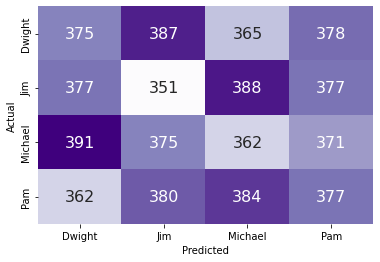

In [423]:
dsCharNumber=[]
for c in trainDS.character:
  if c == 'Jim':
    dsCharNumber.append(0)
  if c == 'Michael':
    dsCharNumber.append(1)
  if c == 'Dwight':
    dsCharNumber.append(2)
  if c == 'Pam':
    dsCharNumber.append(3)

plotConfusionMatrix(dsCharNumber,authors)

Accuracy: 0.254
Precision: 0.064
Recall: 0.250
F1: 0.101


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


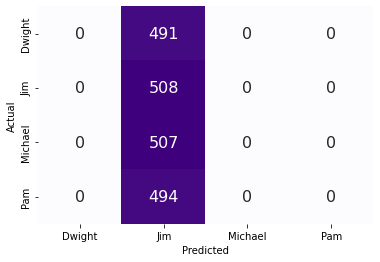

In [424]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dummy_mf=DummyClassifier(strategy="most_frequent")
dummy_mf.fit(trainDS.quote, trainDS.character)
labelsPredicted=dummy_mf.predict(validationDS.quote)

accuDMF=accuracy_score(validationDS.character,labelsPredicted)
precDMF=precision_score(validationDS.character,labelsPredicted,average='macro')
reccDMF=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sDMF=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuDMF:.3f}")
print("Precision:",f"{precDMF:.3f}")
print("Recall:",f"{reccDMF:.3f}")
print("F1:",f"{f1sDMF:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

Accuracy: 0.246
Precision: 0.246
Recall: 0.246
F1: 0.246


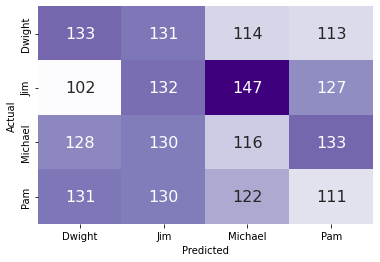

In [425]:
dummy_strat=DummyClassifier(strategy="stratified")
dummy_strat.fit(trainDS.quote, trainDS.character)
labelsPredicted=dummy_strat.predict(validationDS.quote)

accuDST=accuracy_score(validationDS.character,labelsPredicted)
precDST=precision_score(validationDS.character,labelsPredicted,average='macro')
reccDST=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sDST=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuDST:.3f}")
print("Precision:",f"{precDST:.3f}")
print("Recall:",f"{reccDST:.3f}")
print("F1:",f"{f1sDST:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

Accuracy: 0.254
Precision: 0.376
Recall: 0.250
F1: 0.104


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


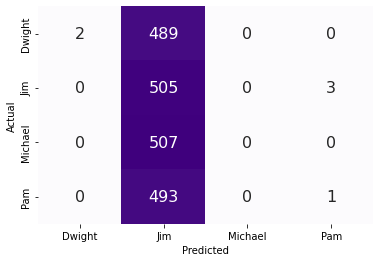

In [426]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

ohEncoder = OneHotEncoder(handle_unknown='ignore')
ohLabelsT = ohEncoder.fit_transform(trainDS.quote.array.reshape(-1,1)).toarray()
ohLabelsV = ohEncoder.transform(validationDS.quote.array.reshape(-1,1)).toarray()

logistReg=LogisticRegression(random_state=42).fit(ohLabelsT,trainDS.character)
labelsPredicted=logistReg.predict(ohLabelsV)

accuOHL=accuracy_score(validationDS.character,labelsPredicted)
precOHL=precision_score(validationDS.character,labelsPredicted,average='macro')
reccOHL=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sOHL=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuOHL:.3f}")
print("Precision:",f"{precOHL:.3f}")
print("Recall:",f"{reccOHL:.3f}")
print("F1:",f"{f1sOHL:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

Accuracy: 0.424
Precision: 0.424
Recall: 0.425
F1: 0.424


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


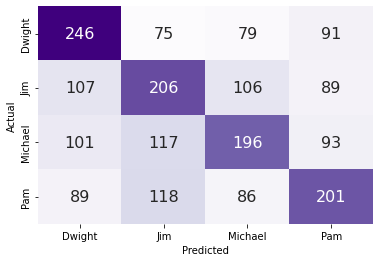

In [427]:
vectorizer = TfidfVectorizer()
matrixT = vectorizer.fit_transform(trainDS.quote)
matrixV = vectorizer.transform(validationDS.quote)

logistReg=LogisticRegression(random_state=42).fit(matrixT,trainDS.character)
labelsPredicted=logistReg.predict(matrixV)

accuTFL=accuracy_score(validationDS.character,labelsPredicted)
precTFL=precision_score(validationDS.character,labelsPredicted,average='macro')
reccTFL=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sTFL=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuTFL:.3f}")
print("Precision:",f"{precTFL:.3f}")
print("Recall:",f"{reccTFL:.3f}")
print("F1:",f"{f1sTFL:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

Accuracy: 0.254
Precision: 0.376
Recall: 0.250
F1: 0.104


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


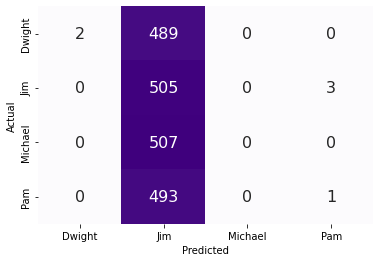

In [428]:
from sklearn import svm

svc = svm.SVC(kernel='rbf')
svc.fit(ohLabelsT, trainDS.character)
predictedLabels = svc.predict(ohLabelsV)

accuSVC=accuracy_score(validationDS.character,predictedLabels)
precSVC=precision_score(validationDS.character,predictedLabels,average='macro')
reccSVC=recall_score(validationDS.character,predictedLabels,average='macro')
f1sSVC=f1_score(validationDS.character,predictedLabels,average='macro')
print("Accuracy:",f"{accuSVC:.3f}")
print("Precision:",f"{precSVC:.3f}")
print("Recall:",f"{reccSVC:.3f}")
print("F1:",f"{f1sSVC:.3f}")

plotConfusionMatrix(validationDS.character,predictedLabels)



Accuracy: 0.311
Precision: 0.311
Recall: 0.310
F1: 0.305


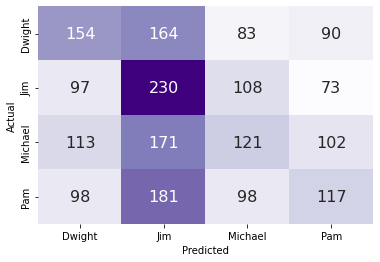

In [429]:
from sklearn.neighbors import KNeighborsClassifier

vectorizer = TfidfVectorizer()
matrixT = vectorizer.fit_transform(trainDS.quote)
matrixV = vectorizer.transform(validationDS.quote)

kNeigh=KNeighborsClassifier().fit(matrixT,trainDS.character)
labelsPredicted=kNeigh.predict(matrixV)

accuKN=accuracy_score(validationDS.character,labelsPredicted)
precKN=precision_score(validationDS.character,labelsPredicted,average='macro')
reccKN=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sKN=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuKN:.3f}")
print("Precision:",f"{precKN:.3f}")
print("Recall:",f"{reccKN:.3f}")
print("F1:",f"{f1sKN:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

In [430]:
resTable={
    'Model':['Dummy Classifier - most_frequent','Dummy Classifier - stratified',' LogisticRegression - One-hot vectorization', 'LogisticRegression - TF-IDF vectorization','SVC Classifier - One-hot vectorization','KNeighborsClassifier - TF-IDF vectorization'],
    'Accuracy':[f"{accuDMF:.3f}",f"{accuDST:.3f}",f"{accuOHL:.3f}",f"{accuTFL:.3f}",f"{accuSVC:.3f}",f"{accuKN:.3f}"],
    'Precision':[f"{precDMF:.3f}",f"{precDST:.3f}",f"{precOHL:.3f}",f"{precTFL:.3f}",f"{precSVC:.3f}",f"{precKN:.3f}"],
    'Recall':[f"{reccDMF:.3f}",f"{reccDST:.3f}",f"{reccOHL:.3f}",f"{reccTFL:.3f}",f"{reccSVC:.3f}",f"{reccKN:.3f}"],
    'F1':[f"{f1sDMF:.3f}",f"{f1sDST:.3f}",f"{f1sOHL:.3f}",f"{f1sTFL:.3f}",f"{f1sSVC:.3f}",f"{f1sKN:.3f}"]
}

tableFrameRes=pd.DataFrame(resTable).sort_values(by='F1', ascending=False)
print('Table displaying the results for each model\n')
print(tableFrameRes.to_string(index=False))

Table displaying the results for each model

                                      Model Accuracy Precision Recall    F1
  LogisticRegression - TF-IDF vectorization    0.424     0.424  0.425 0.424
KNeighborsClassifier - TF-IDF vectorization    0.311     0.311  0.310 0.305
              Dummy Classifier - stratified    0.246     0.246  0.246 0.246
 LogisticRegression - One-hot vectorization    0.254     0.376  0.250 0.104
     SVC Classifier - One-hot vectorization    0.254     0.376  0.250 0.104
           Dummy Classifier - most_frequent    0.254     0.064  0.250 0.101


In [431]:
print('\nThe best performing classifier\n')
print('LogisticRegression - TF-IDF vectorization')
print("Accuracy:",f"{accuTFL:.3f}")
print("Precision:",f"{precTFL:.3f}")
print("Recall:",f"{reccTFL:.3f}")
print("F1:",f"{f1sTFL:.3f}")



The best performing classifier

LogisticRegression - TF-IDF vectorization
Accuracy: 0.424
Precision: 0.424
Recall: 0.425
F1: 0.424


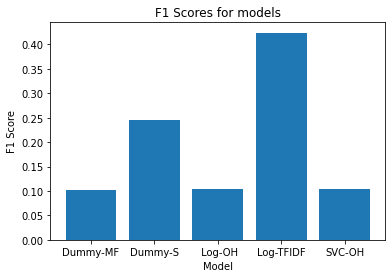

In [432]:
import matplotlib.pyplot as plot

models = ['Dummy-MF','Dummy-S',' Log-OH', 'Log-TFIDF','SVC-OH']
f1Scores = [float(f"{f1sDMF:.3f}"),float(f"{f1sDST:.3f}"),float(f"{f1sOHL:.3f}"),float(f"{f1sTFL:.3f}"),float(f"{f1sSVC:.3f}")]

plot.bar(models, f1Scores)
plot.ylabel('F1 Score')
plot.xlabel('Model')
plot.title('F1 Scores for models')
plot.show()

In [ ]:
# from sklearn.model_selection import ParameterGrid
# param_grid = {'C': [10**-3, 10**-2, 10**-1,1, 10, 10**2, 10**3,10**4,10**5], 'sublinear_tf': [None, 6250,12500,18750,25000,31250,37500,43750,50000], 'max_features': [None, 6250,12500,18750,25000,31250,37500,43750,50000]}
# f1s=0
# c=0
# sublinear_tf=None
# max_features=None
# for params in ParameterGrid(param_grid):

#   vectorizer = TfidfVectorizer(sublinear_tf=params['sublinear_tf'], max_features=params['max_features'])
#   matrixT = vectorizer.fit_transform(trainDS.quote)
#   matrixV = vectorizer.transform(validationDS.quote)

#   logistReg=LogisticRegression(C=params['C'], random_state=42).fit(matrixT,trainDS.character)
#   labelsPredicted=logistReg.predict(matrixV)

#   f1=f1_score(validationDS.character,labelsPredicted,average='macro')
#   if f1 > f1s:
#     f1s=f1
#     c=params['C']
#     sublinear_tf=params['sublinear_tf']
#     max_features=params['max_features']
# print(f"{f1s:.3f}")
# print(c)
# print(sublinear_tf)
# print(max_features)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.426
Precision: 0.425
Recall: 0.427
F1: 0.426


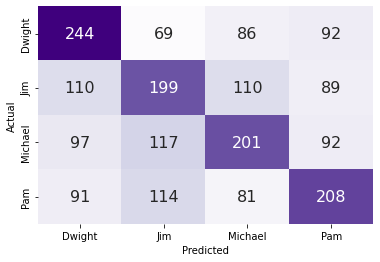

In [433]:
# Results using output of above function

vectorizer = TfidfVectorizer(sublinear_tf=6250, max_features=6250)
matrixT = vectorizer.fit_transform(trainDS.quote)
matrixV = vectorizer.transform(validationDS.quote)

logistReg=LogisticRegression(C=1, random_state=42).fit(matrixT,trainDS.character)
labelsPredicted=logistReg.predict(matrixV)

accuParam=accuracy_score(validationDS.character,labelsPredicted)
precParam=precision_score(validationDS.character,labelsPredicted,average='macro')
reccParam=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sParam=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuParam:.3f}")
print("Precision:",f"{precParam:.3f}")
print("Recall:",f"{reccParam:.3f}")
print("F1:",f"{f1sParam:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.427
Precision: 0.427
Recall: 0.428
F1: 0.427


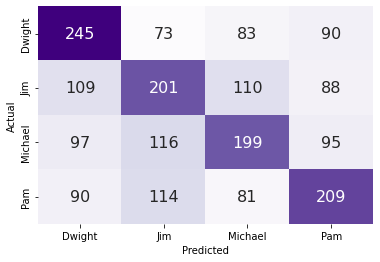

In [436]:
#Results now with added max_df param and some more tuning

vectorizer = TfidfVectorizer(sublinear_tf=6250, max_features=6250, max_df=0.55)
matrixT = vectorizer.fit_transform(trainDS.quote)
matrixV = vectorizer.transform(validationDS.quote)

logistReg=LogisticRegression(C=1.07, random_state=42).fit(matrixT,trainDS.character)
labelsPredicted=logistReg.predict(matrixV)

accuParam=accuracy_score(validationDS.character,labelsPredicted)
precParam=precision_score(validationDS.character,labelsPredicted,average='macro')
reccParam=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sParam=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuParam:.3f}")
print("Precision:",f"{precParam:.3f}")
print("Recall:",f"{reccParam:.3f}")
print("F1:",f"{f1sParam:.3f}")


plotConfusionMatrix(validationDS.character,labelsPredicted)

In [437]:
resTableParam={
    'State':['Before Tuning','After Tuning'],
    'Accuracy':[f"{accuTFL:.3f}",f"{accuParam:.3f}"],
    'Precision':[f"{precTFL:.3f}",f"{precParam:.3f}"],
    'Recall':[f"{reccTFL:.3f}",f"{reccParam:.3f}"],
    'F1':[f"{f1sTFL:.3f}",f"{f1sParam:.3f}"]
}

tableFrameRes=pd.DataFrame(resTableParam)
print('Table displaying the results for each model\n')
print(tableFrameRes.to_string(index=False))

Table displaying the results for each model

        State Accuracy Precision Recall    F1
Before Tuning    0.424     0.424  0.425 0.424
 After Tuning    0.427     0.427  0.428 0.427
